# **AirBnb Listing Analysis**

Hi all, I'll be performing exploratory data analysis on dataset AirBnB listings provided by Maven Analytics

**Objective 1: Profile & QA the Data**
* Read in the AirBnB listings data.
* Cast any date columns as a datetime format.
* Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’.
* QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv("/kaggle/input/airbnb-maven-analytics/Airbnb Data/Listings.csv", encoding= "ISO-8859-1", low_memory=False)
# use encoding="ISO-8859-1" and low_memory=False to read in data

In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [5]:
listings["host_since"] = pd.to_datetime(listings["host_since"])
# Cast host_since column as a datetime format

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [6]:
paris_listings = listings.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
# Filter the data down to rows where the city is Paris, and keep only required columns

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
paris_listings.isna().sum()
#  check for missing values

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [8]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [9]:
paris_listings.query("accommodates == 0 and price == 0").count()
# count the value 0 in columns

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

**Objective 2: Prepare data for visualization**
* Create a DataFrame named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the average price sorted in ascending order.
* Create a DataFrame named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and calculates the average price for each sorted in ascending order.
* Create a DataFrame called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts.

In [10]:
paris_listings_neighbourhood = paris_listings.groupby("neighbourhood").agg({"price" : "mean"}).sort_values("price")
# groupby data by neighbourhood & calculate avg price, sorted in ascending order

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [11]:
paris_listings_accommodates = paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price" : "mean"}).sort_values("price")
# filtered down expensive neighbourhood & groupby data by accommodates & calculate avg price, sorted in ascending order

paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [12]:
paris_listings_over_time = paris_listings.set_index("host_since").resample("YE").agg({"neighbourhood" : "count", "price" : "mean"})
#grouped by the ‘host_since’ year, and calculate the average price and count of rows 

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


**Objective 3: Visualize data and summarize findings**
* Create a horizontal bar chart of the average price by neighborhood in Paris.
* Create a horizontal bar chart of the average price by ‘accommodates’ in most expensive neighborhood.
* Create two line charts: one showing the count of new hosts over time, and one showing average price.
* Challenge : Create a dual axis line chart to show both new hosts and average price over time.

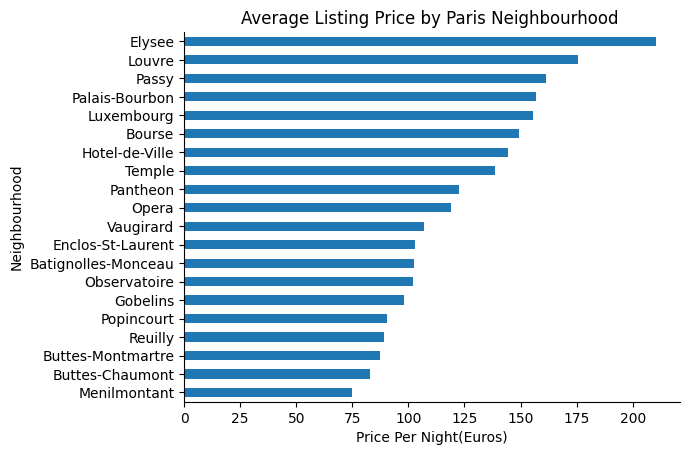

In [13]:
paris_listings_neighbourhood.plot.barh(title = "Average Listing Price by Paris Neighbourhood ", 
                                      xlabel = "Price Per Night(Euros)",
                                      ylabel = "Neighbourhood",
                                      legend = None)

sns.despine()

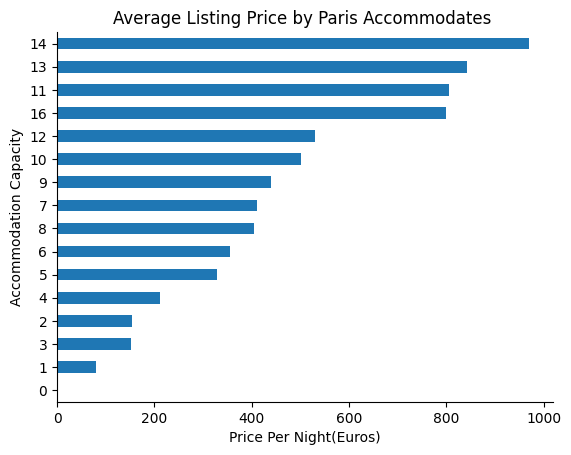

In [14]:
paris_listings_accommodates.plot.barh(title = "Average Listing Price by Paris Accommodates ", 
                                      xlabel = "Price Per Night(Euros)",
                                      ylabel = "Accommodation Capacity",
                                      legend = None)

sns.despine()

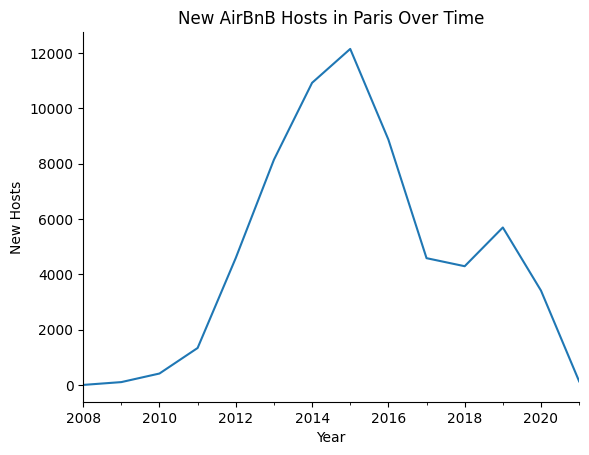

In [15]:
paris_listings_over_time["neighbourhood"].plot(title = "New AirBnB Hosts in Paris Over Time" ,
                                               ylabel = "New Hosts",
                                              xlabel = "Year")

sns.despine()

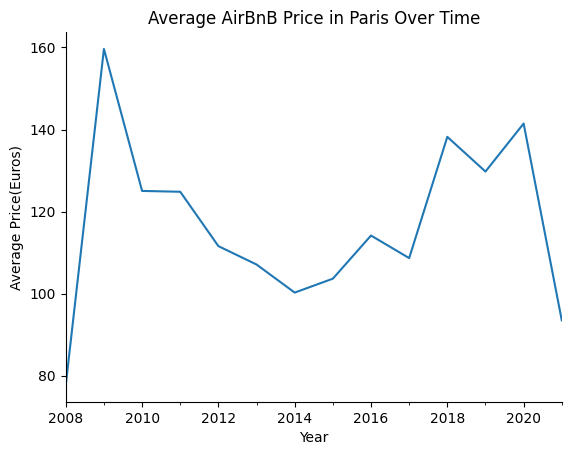

In [16]:
paris_listings_over_time["price"].plot(title = "Average AirBnB Price in Paris Over Time" ,
                                               ylabel = "Average Price(Euros)",
                                              xlabel = "Year")

sns.despine()

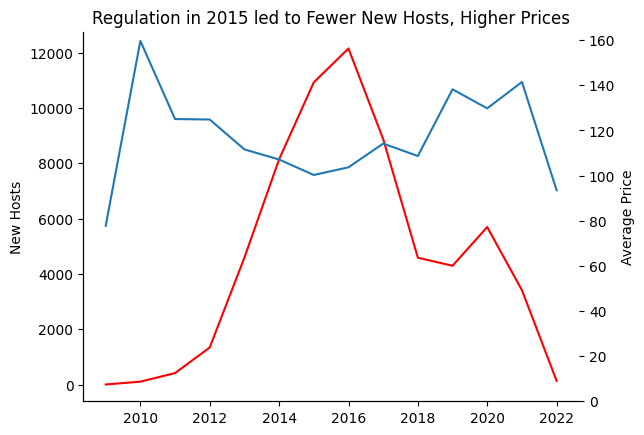

In [17]:
fig, ax = plt.subplots()

ax.plot(paris_listings_over_time.index, paris_listings_over_time["neighbourhood"],
       label = "New Hosts", c="red")
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(paris_listings_over_time.index, paris_listings_over_time["price"],
       label = "Average Price")
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("Regulation in 2015 led to Fewer New Hosts, Higher Prices")

sns.despine()